# Import Libraries

In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# SET UP

In [84]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load Datasets

In [85]:
df = pd.read_csv('/Users/Jai/Documents/Git_remote/DataScience/Capstone/data_sources/dataset1/US_healthcare_data-2122020.csv')

In [86]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,...,repaglinide,glipizide,insulin,change,diabetesMed,readmitted,age_derived,count_Steady,count_Down,count_Up
0,Caucasian,Female,[0-30),Others,Others,Referral,-1.632460,-0.108475,-3.304858,-0.443669,...,No,No,No,No,No,NO,-2.390913,-0.964053,-0.386999,-0.382050
1,Caucasian,Female,[0-30),Emergency,Discharged to home,Emergency Room,-0.271144,0.808522,0.408817,-0.443669,...,No,No,Up,Ch,Yes,NO,-2.390913,-0.964053,-0.386999,2.617432
2,AfricanAmerican,Female,[0-30),Emergency,Discharged to home,Emergency Room,-0.825587,-1.629615,-0.237590,2.278833,...,No,Steady,No,No,Yes,NO,-2.390913,0.835716,-0.386999,-0.382050
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,-0.825587,0.044197,0.167145,-0.443669,...,No,No,Up,Ch,Yes,NO,-1.716517,-0.964053,-0.386999,2.617432
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,-1.632460,0.400694,-1.082723,-0.443669,...,No,Steady,Steady,Ch,Yes,NO,-1.267255,1.525004,-0.386999,-0.382050


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  object 
 3   admission_type_id         101766 non-null  object 
 4   discharge_disposition_id  101766 non-null  object 
 5   admission_source_id       101766 non-null  object 
 6   time_in_hospital          101766 non-null  float64
 7   num_lab_procedures        101766 non-null  float64
 8   num_medications           101766 non-null  float64
 9   number_outpatient         101766 non-null  float64
 10  number_emergency          101766 non-null  float64
 11  number_inpatient          101766 non-null  float64
 12  diag_1                    101766 non-null  object 
 13  diag_2                    101766 non-null  o

In [88]:
df["readmitted"].value_counts()

NO     90409
<30    11357
Name: readmitted, dtype: int64

In [89]:
df.describe()

,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_derived,count_Steady,count_Down,count_Up
count,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05
mean,2.029912e-10,-1.832454e-11,4.560337e-11,-1.623414e-10,1.094288e-10,-3.306374e-10,-2.043695e-10,-2.626043e-11,-2.302286e-10,3.418431e-10,-1.546488e-10
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.632460e+00,-2.131835e+00,-3.304858e+00,-4.436687e-01,-3.548828e-01,-7.056401e-01,-2.125874e+00,-2.390913e+00,-9.640533e-01,-3.869992e-01,-3.820496e-01
25%,-8.255868e-01,-6.168049e-01,-7.114438e-01,-4.436687e-01,-3.548828e-01,-7.056401e-01,-9.096844e-01,-7.530013e-01,-9.640533e-01,-3.869992e-01,-3.820496e-01
50%,1.488889e-01,4.419680e-02,3.846507e-02,-4.436687e-01,-3.548828e-01,-7.056401e-01,1.725310e-01,-1.784998e-01,-9.640533e-01,-3.869992e-01,-3.820496e-01
75%,7.661083e-01,7.065280e-01,6.326173e-01,-4.436687e-01,-3.548828e-01,1.229785e+00,8.650898e-01,4.525627e-01,8.357161e-01,-3.869992e-01,-3.820496e-01
max,2.095259e+00,4.543249e+00,4.370039e+00,2.285007e+00,2.820313e+00,1.781169e+00,8.972999e+00,1.498830e+00,2.140223e+00,2.585455e+00,2.618762e+00


Saving figure attribute_histogram_plots


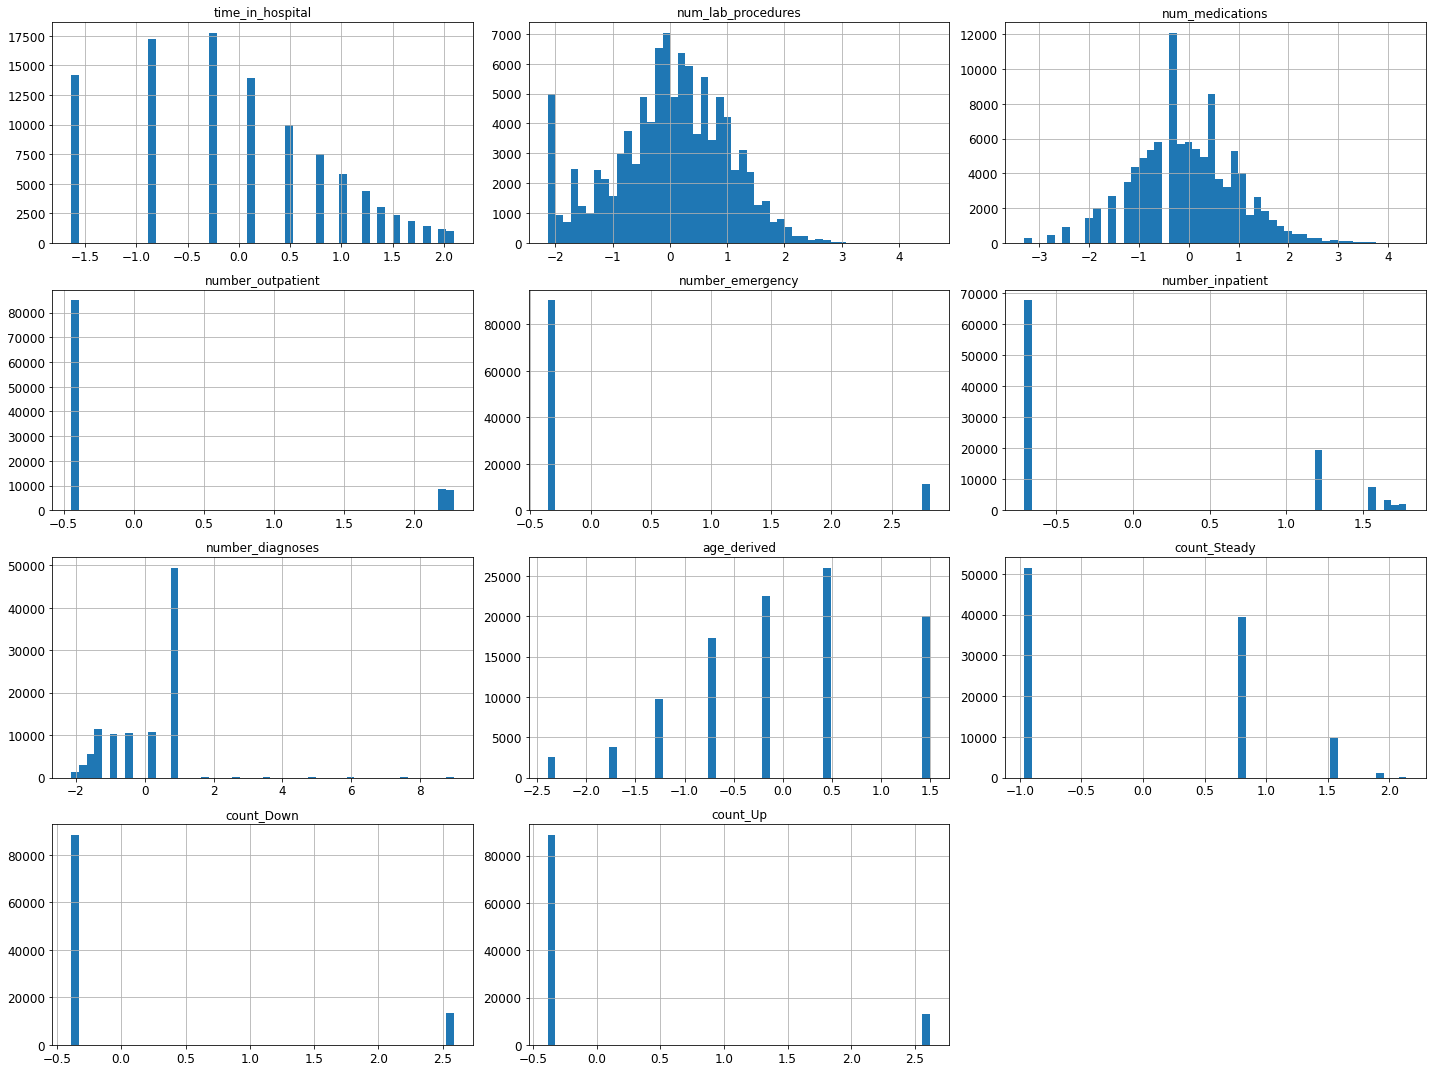

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [91]:
# to make this notebook's output identical at every run
np.random.seed(42)

# EDA

# Plotting the distribution of the target variable

In [1]:

sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmitted (Target Variable)')
plt.show()

NameError: name 'sns' is not defined

# Checking Missing Values

In [ ]:

print("\nMissing Values Per Column:")
print(df.isnull().sum())  # Checking for missing values



Missing Values Per Column:
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
glipizide                   0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
age_derived                 0
count_Steady                0
count_Down                  0
count_Up                    0
dtype: int64


# Visualize missing values

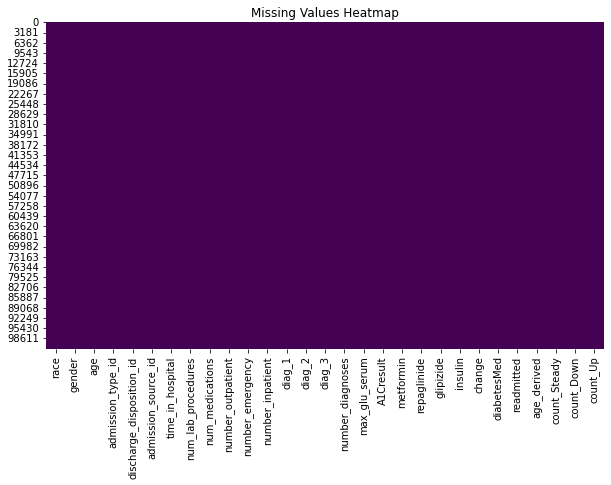

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Categorical Variable Exploration

In [ ]:

print("\nDistribution of Categorical Variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


Distribution of Categorical Variables:

race Value Counts:
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

gender Value Counts:
Female    54711
Male      47055
Name: gender, dtype: int64

age Value Counts:
[70-80)     26068
[60-70)     22483
[80-100)    19990
[50-60)     17256
[40-50)      9685
[30-40)      3775
[0-30)       2509
Name: age, dtype: int64

admission_type_id Value Counts:
Emergency    54011
Elective     18869
Urgent       18480
Others       10406
Name: admission_type_id, dtype: int64

discharge_disposition_id Value Counts:
Discharged to home        60234
Discharged/Transferred    20796
Hospice                   13781
Others                     5303
Expired                    1652
Name: discharge_disposition_id, dtype: int64

admission_source_id Value Counts:
Emergency Room    57494
Referral          30856
Others             7088
Transfer           6328
Name: admission_s

# Bar plots for categorical variables

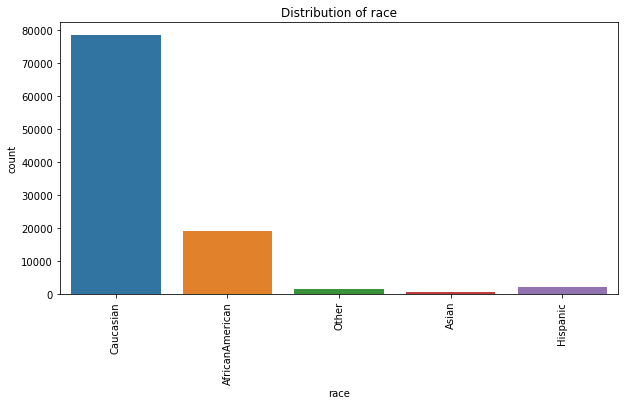

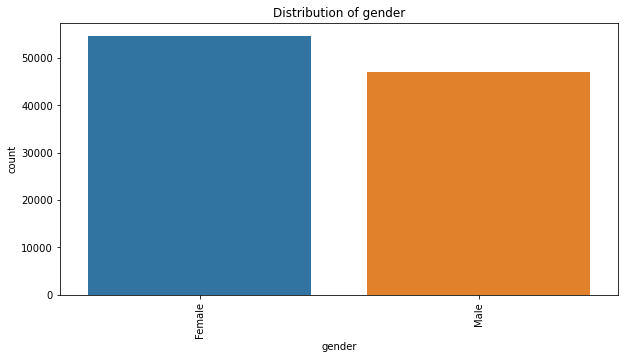

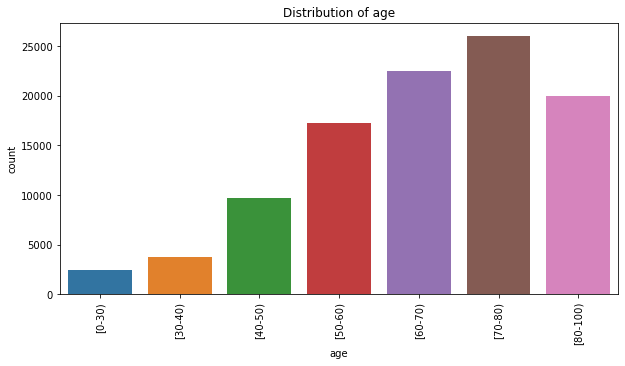

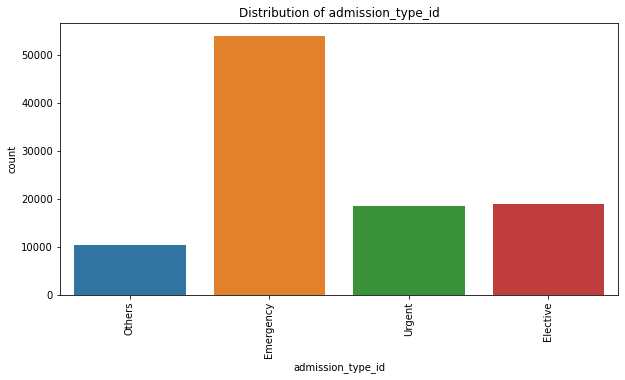

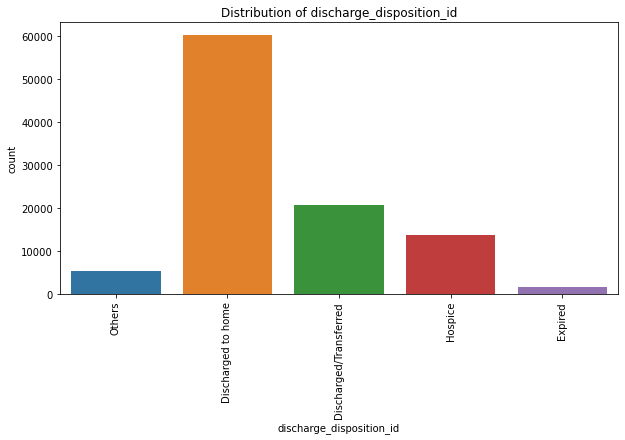

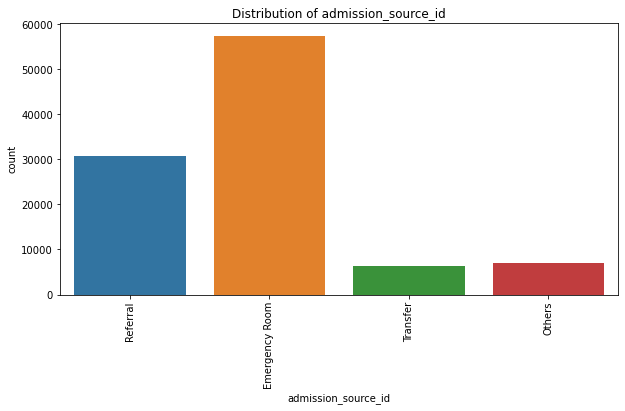

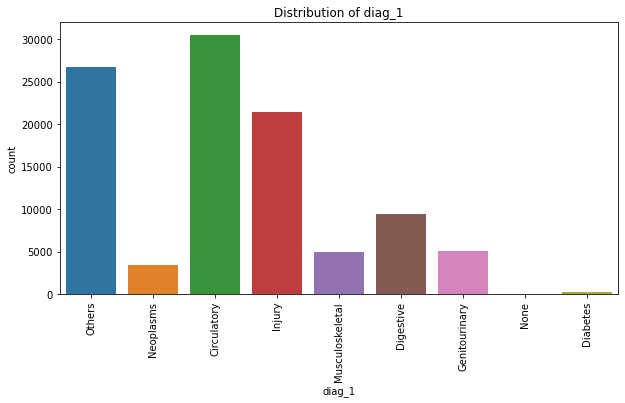

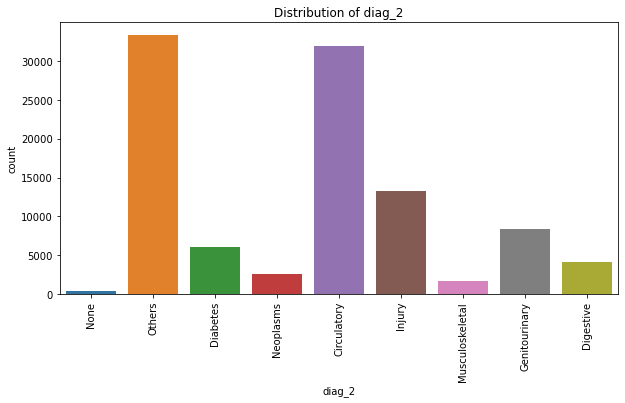

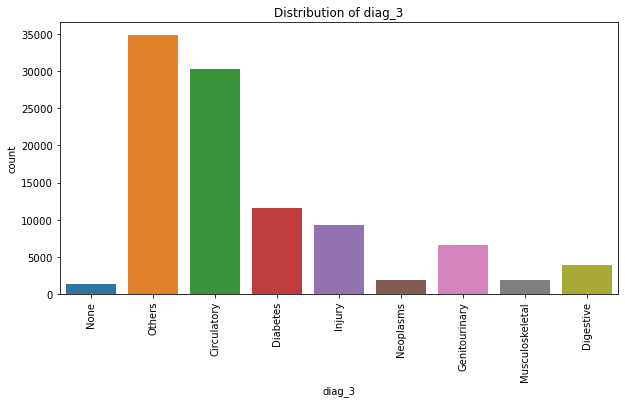

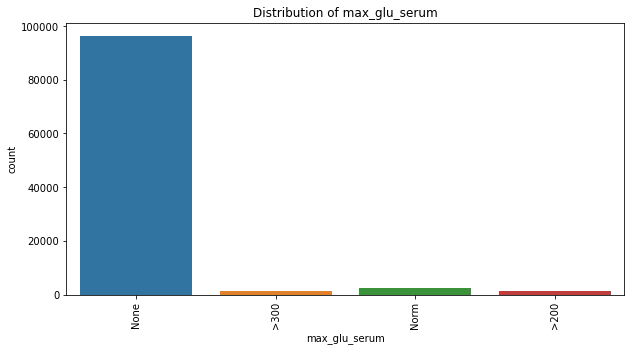

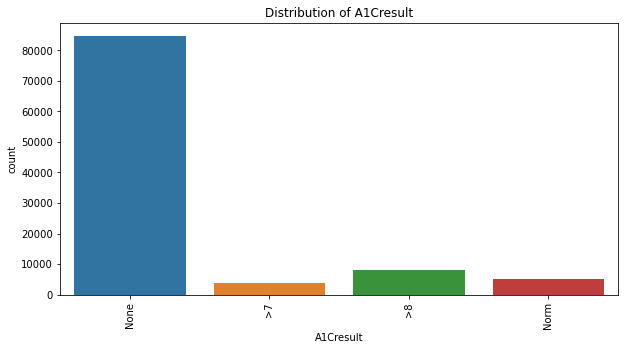

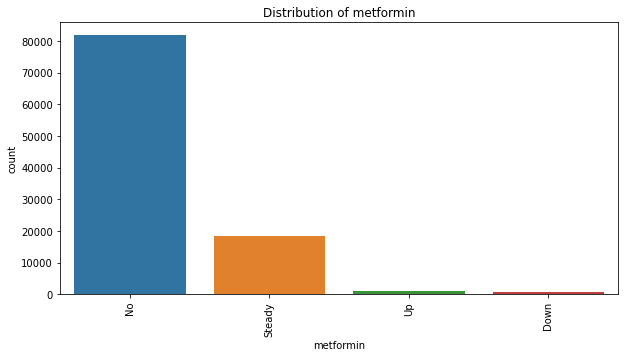

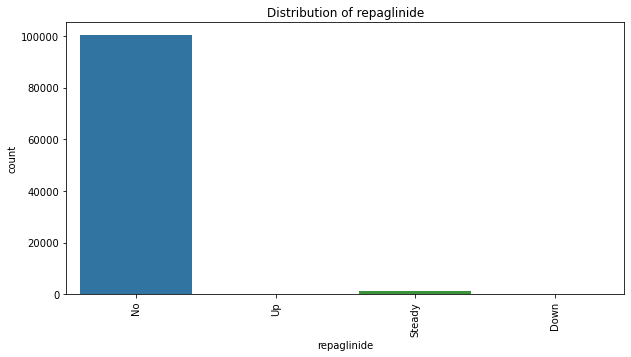

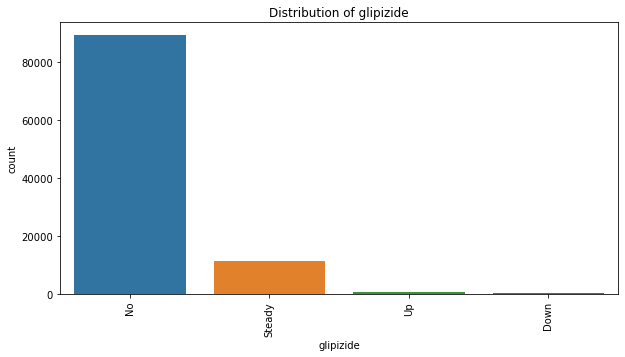

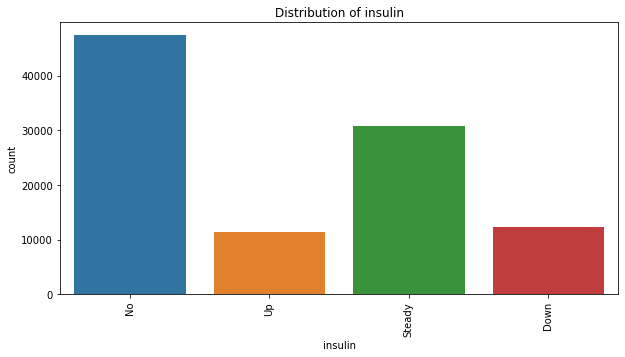

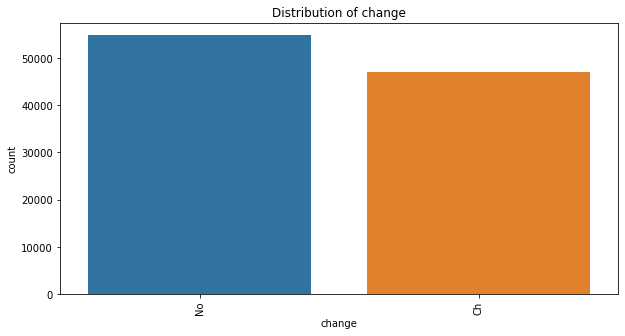

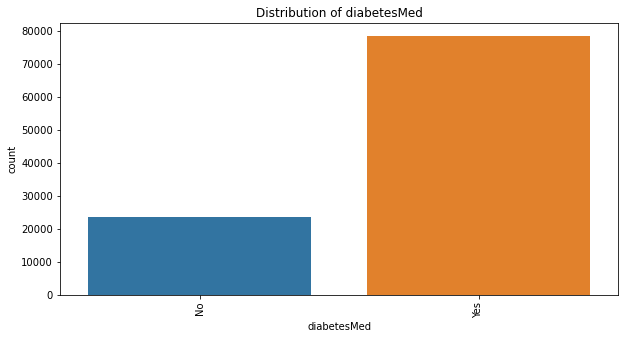

In [ ]:

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

# Numerical Variable Exploration


Summary of Numerical Variables:


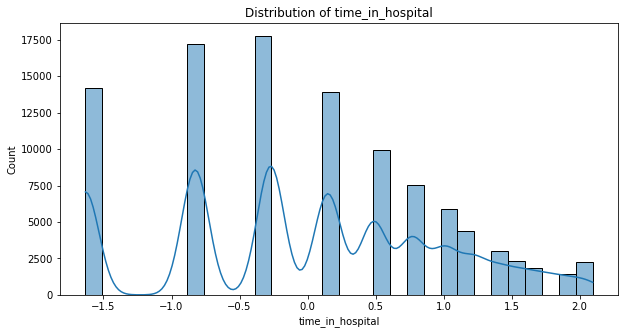

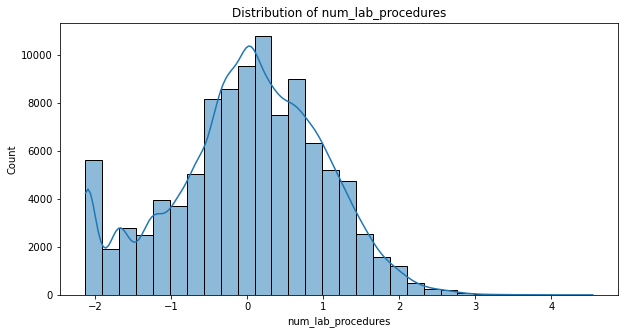

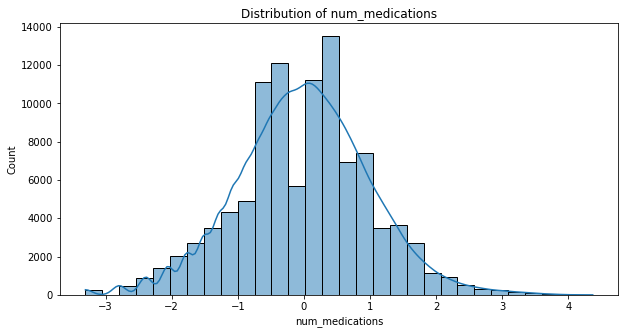

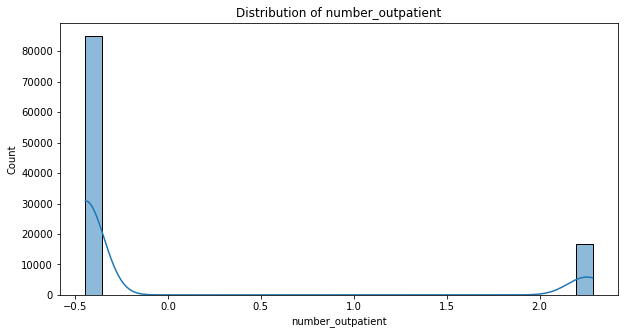

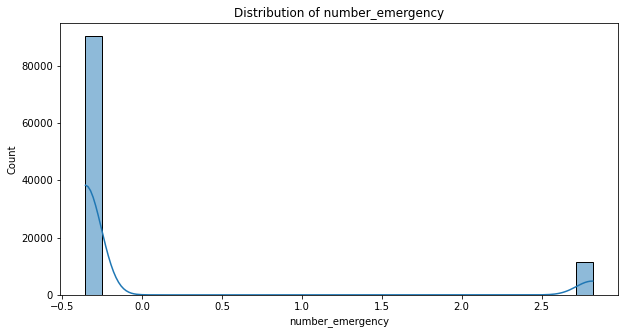

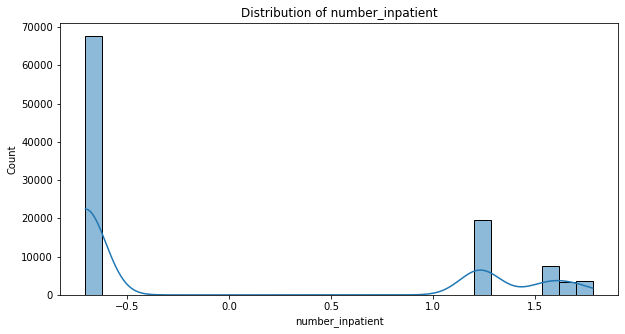

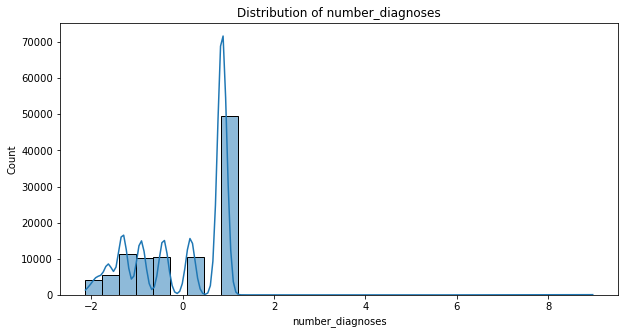

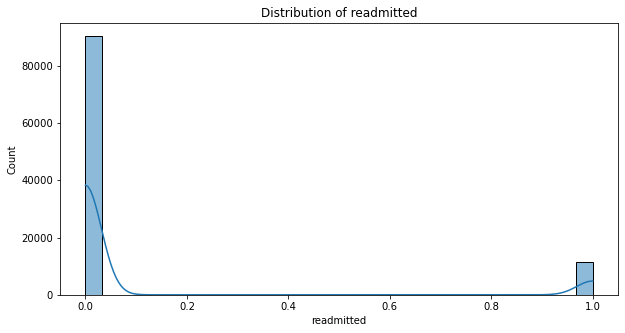

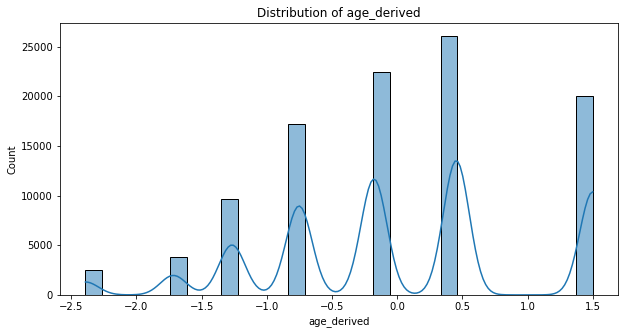

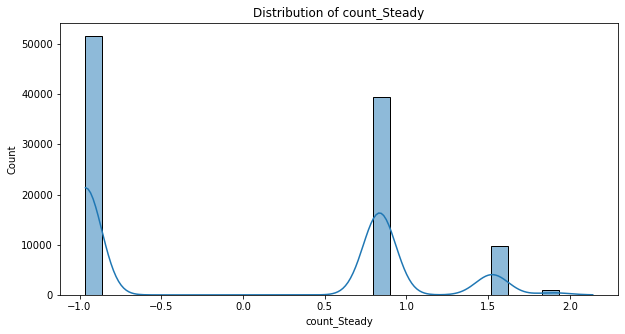

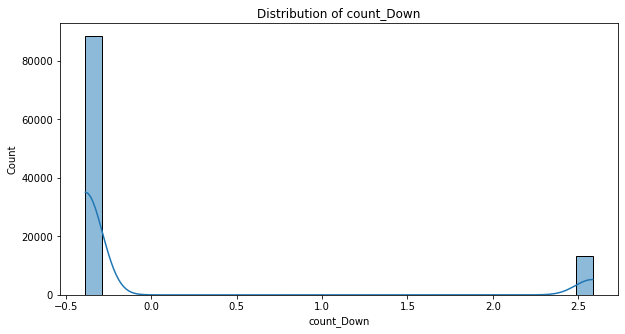

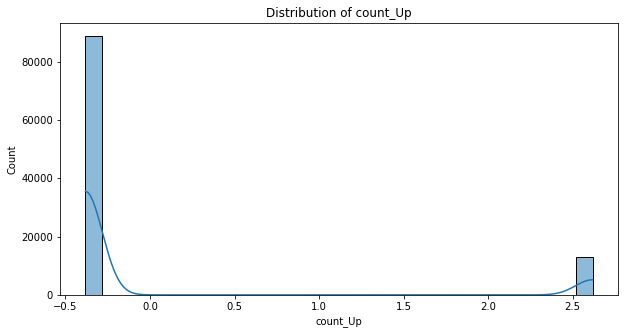

In [ ]:

print("\nSummary of Numerical Variables:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation Analysis


Correlation Matrix:


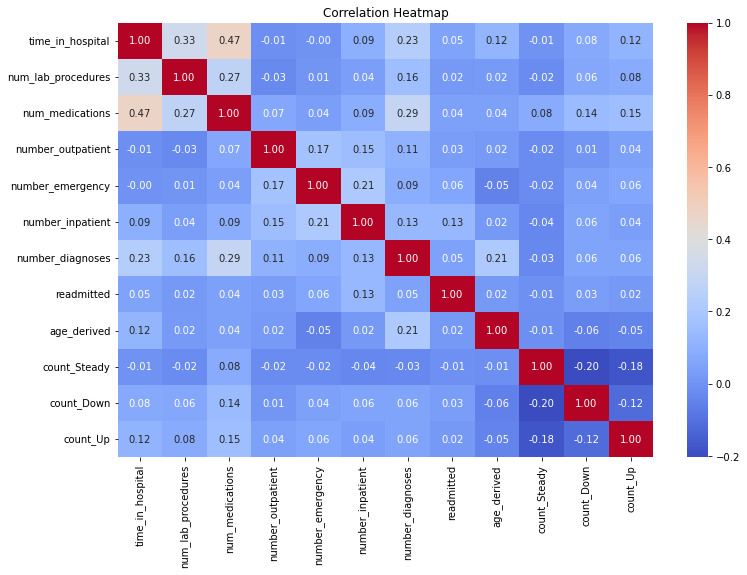

In [ ]:

print("\nCorrelation Matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Analyze relationships with the target variable

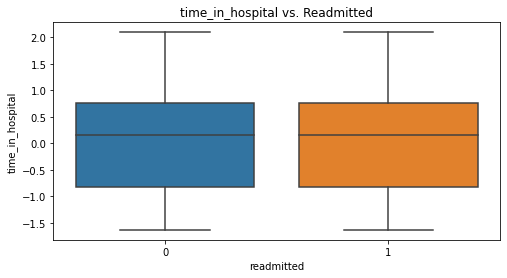

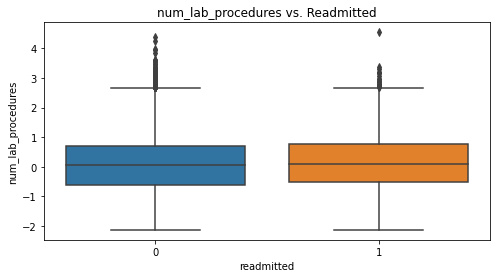

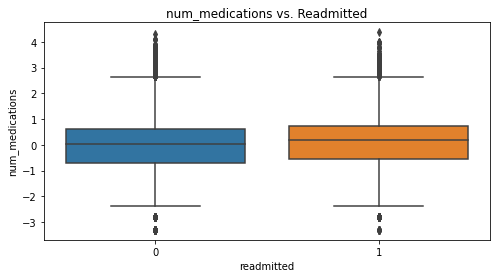

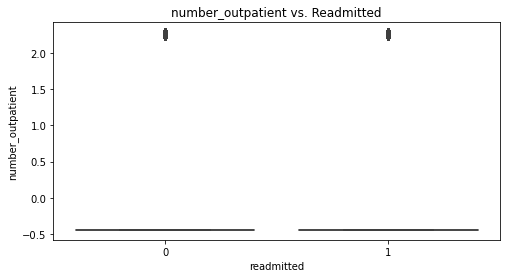

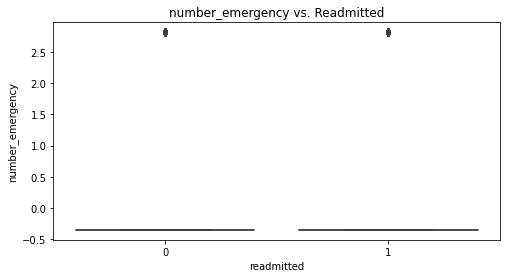

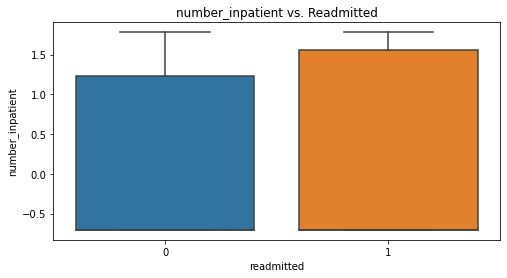

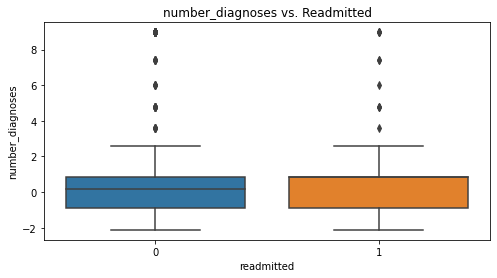

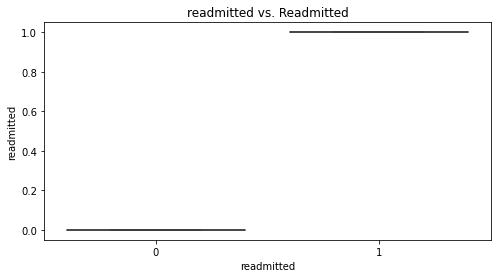

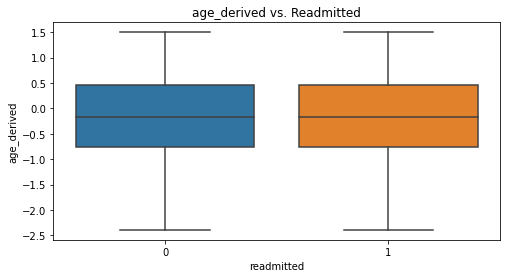

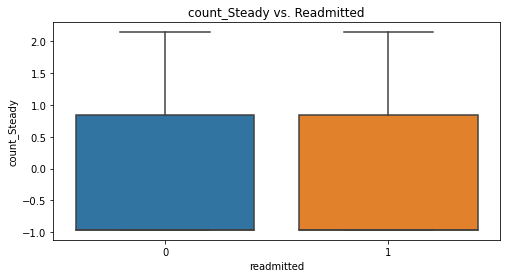

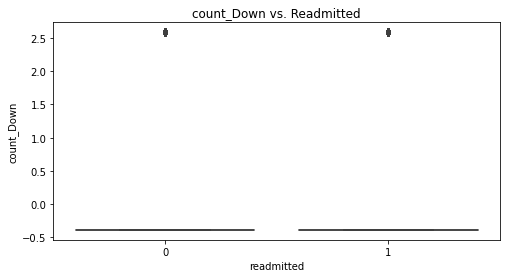

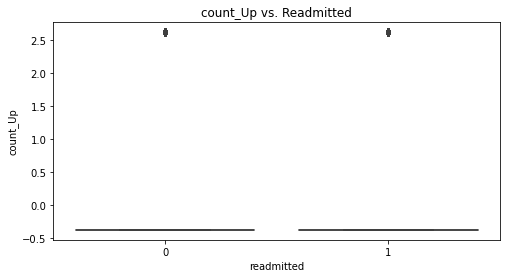

In [ ]:

# Plot correlation between numerical variables and the target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='readmitted', y=col, data=df)
    plt.title(f'{col} vs. Readmitted')
    plt.show()